In [1]:
% pylab inline

import sys
import os
import numpy as np

from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')
import pandas as pd
import sklearn
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn import ensemble
import glob
from gatspy import periodic


Populating the interactive namespace from numpy and matplotlib


In [40]:
for i,file in enumerate(glob.glob('/Users/jmartine/science/github/stripe82-class/challenge/train/LC_*dat')):
    print i,file

0 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1000837.dat
1 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1001793.dat
2 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1002076.dat
3 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1002162.dat
4 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1002453.dat
5 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_100286.dat
6 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1003180.dat
7 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1003235.dat
8 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1003694.dat
9 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1004332.dat
10 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_100520.dat
11 /Users/jmartine/science/github/stripe82-class/challenge/train/LC_1005316.dat
12 /Users/jmartine/science/github/stripe82-class/cha

In [2]:
import FATS
import time
start = time.time()

df_collection = {}
feats_collection = {}

for i,file in enumerate(glob.glob('/Users/jmartine/science/github/stripe82-class/challenge/all/LC_*dat')):
    if (i%100 == 0): print i
    #print i, file
    df_collection[i] = pd.read_csv(file, comment='#', delimiter=" ",names=["time","filter","mag","mag_err"])
    df_collection[i] = df_collection[i][df_collection[i]['mag'] >= 0] #Cleaning the data
    times = np.array(map(float,df_collection[i].ix[:,0].values))
    mags = np.array(map(float,df_collection[i].ix[:,2].values))
    dmags = np.array(map(float,df_collection[i].ix[:,3].values))
    filters = df_collection[i].ix[:,1].values
    mags_g = mags[filters == 'g']
    times_g = times[filters == 'g']
    dmags_g = dmags[filters == 'g']
    mags_z = mags[filters == 'z']
    times_z = times[filters == 'z']
    dmags_z = dmags[filters == 'z']
    lc = np.array([mags_g, times_g, dmags_g, mags_z, times_z, dmags_z])
    a = FATS.FeatureSpace(Data=['magnitude','time','error','magnitude2','time2','error2'],
                     featureList=['Amplitude','PeriodLS','CAR_sigma','CAR_mean','CAR_tau',
                                  'Color','Autocor_length','LinearTrend','MaxSlope','Eta_e',
                                 'Freq1_harmonics_amplitude_0',
                                 'StetsonK','MedianBRP'])
    a = a.calculateFeature(lc)
    feats_collection[i] = a.result(method='dict')
    
end = time.time()
print "time elapsed = ", (end - start)

0


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return (np.median(sorted_mag[-math.ceil(0.05 * N):]) -
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  np.median(sorted_mag[0:math.ceil(0.05 * N)])) / 2.0
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/lomb.py:151: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  wk1 = wk1[1:nout+1]
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/lomb.py:152: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  wk2 = wk2[1:nout+1]
/Users/jmartine/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.p

100


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:930: RuntimeWarning: overflow encountered in exp
  a_new = np.exp(-(t[i] - t[i - 1]) / tau)
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:935: RuntimeWarning: invalid value encountered in add
  (x_ast[i - 1] - x_hat[i - 1]))
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:934: RuntimeWarning: invalid value encountered in divide
  (a_new * Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1])) *
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:939: RuntimeWarning: invalid value encountered in divide
  (1 - (Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1]))))
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:938: RuntimeWarning: overflow encountered in square
  Omega[0] * (1 - (a_new ** 2)) + ((a_new ** 2)) * Omega[i - 1] *


200
300


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:933: RuntimeWarning: invalid value encountered in multiply
  a_new * x_hat[i - 1] +


400
500


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:934: RuntimeWarning: invalid value encountered in multiply
  (a_new * Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1])) *
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:938: RuntimeWarning: invalid value encountered in multiply
  Omega[0] * (1 - (a_new ** 2)) + ((a_new ** 2)) * Omega[i - 1] *
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:939: RuntimeWarning: invalid value encountered in add
  (1 - (Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1]))))
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:949: RuntimeWarning: overflow encountered in square
  (np.exp(-0.5 * (((x_hat[i] - x_ast[i]) ** 2) /
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:950: RuntimeWarning: invalid value encountered in divide
  (Omega[i] + error_vars[i]))) + epsilon))
/Users/jmartine/anaconda/lib/python2

600
700


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:939: RuntimeWarning: invalid value encountered in multiply
  (1 - (Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1]))))


800
900
1000
1100
1200
1300


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:938: RuntimeWarning: overflow encountered in multiply
  Omega[0] * (1 - (a_new ** 2)) + ((a_new ** 2)) * Omega[i - 1] *


1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


/Users/jmartine/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:934: RuntimeWarning: overflow encountered in multiply
  (a_new * Omega[i - 1] / (Omega[i - 1] + error_vars[i - 1])) *
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:933: RuntimeWarning: overflow encountered in multiply
  a_new * x_hat[i - 1] +


7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800


/Users/jmartine/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/jmartine/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000


/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:465: RuntimeWarning: invalid value encountered in divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:729: RuntimeWarning: invalid value encountered in multiply
  S1 = sum(w * (magnitude[1:] - magnitude[:-1]) ** 2)


17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
21300
21400
21500
21600
21700
21800
21900
22000
22100
22200
22300
22400
22500
22600
22700
22800
22900
23000
23100
23200
23300
23400
23500
23600
23700
23800
23900
24000
24100
24200
24300
24400
24500
24600
24700
24800
24900
25000
25100
25200
25300
25400
25500
25600
25700
25800
25900
26000
26100
26200
26300
26400
26500
26600
26700
26800
26900
27000
27100
27200
27300
27400
27500
27600
27700
27800
27900
28000
28100
28200
28300
28400
28500
28600
28700
28800
28900
29000
29100
29200
29300
29400
29500
29600
29700
29800
29900
30000
30100
30200
30300
30400
30500
30600
30700
30800
30900
31000
31100
31200
31300
31400
31500
31600
31700
31800
31900
32000
32100
32200
32300
32400
32500
32600
32700
32800
32900
33000
33100
33200
33300
33400
33500
33600
3370

/Users/jmartine/anaconda/lib/python2.7/site-packages/FATS/FeatureFunctionLib.py:950: RuntimeWarning: divide by zero encountered in log
  (Omega[i] + error_vars[i]))) + epsilon))


CAR lik se fue a inf
38100
38200
38300
38400
38500
38600
38700
38800
38900
39000
39100
39200
39300
39400
39500
39600
39700
39800
39900
40000
40100
40200
40300
40400
40500
40600
40700
40800
40900
41000
41100
41200
41300
41400
41500
41600
41700
41800
41900
42000
42100
42200
42300
42400
42500
42600
42700
42800
42900
43000
43100
43200
43300
CAR lik se fue a inf
43400
43500
43600
43700
43800
43900
44000
44100
44200
44300
44400
44500
44600
44700
44800
44900
45000
45100
45200
45300
45400
45500
45600
45700
45800
45900
46000
46100
46200
46300
46400
46500
46600
46700
46800
46900
47000
47100
47200
47300
47400
47500
47600
47700
47800
47900
48000
48100
48200
48300
48400
48500
48600
48700
48800
48900
49000
49100
49200
49300
49400
49500
49600
49700
49800
49900
50000
50100
50200
50300
50400
50500
50600
50700
50800
50900
51000
51100
51200
51300
51400
51500
51600
51700
51800
51900
52000
52100
52200
52300
52400
52500
52600
52700
52800
52900
53000
53100
53200
53300
53400
53500
53600
53700
53800
53900
5400

In [3]:
np.save('features_test1.npy',feats_collection)

In [2]:
# Load features
feats_collection = np.load('features_test.npy')

In [3]:
d = dict(enumerate(feats_collection.flatten(), 1))

In [4]:
# Create numpy array of features (here you ca select which ones to use)
X = []
for i in range(len(d[1])):
    X.append([ np.log10(d[1][i]['Amplitude']),np.log10(d[1][i]['PeriodLS']),d[1][i]['CAR_sigma'],
              np.log10(d[1][i]['CAR_mean']),np.log10(d[1][i]['CAR_tau']),
              np.log10(d[1][i]['Color']),np.log10(d[1][i]['Autocor_length']), (d[1][i]['LinearTrend']),
              np.log10(d[1][i]['MaxSlope']),np.log10(d[1][i]['Eta_e']),
              np.log10(d[1][i]['Freq1_harmonics_amplitude_0']),np.log10(d[1][i]['Skew']),
              np.log10(d[1][i]['SmallKurtosis']),np.log10(d[1][i]['Con']),d[1][i]['StetsonK'],d[1][i]['MedianBRP']])
    
X = np.array(X)
#obj_ids = numpy.arange(len(X))

/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


In [5]:
# Missing data imputation
print shape(X)
for i in range(len(X[0, :])):
    X[:, i][~np.isfinite(X[:, i])] = mean(X[:, i][np.isfinite(X[:, i])])

(3557, 16)


[ True  True  True ...,  True  True  True]
ModeResult(mode=array([-3.98233026]), count=array([1]))
-0.0179519655473
-0.00707845194305
-0.00745052727974
-0.0087166446115
-0.0137187362552
-0.00513913574891
-0.00906749901723
-0.0129181100815
-0.0373397856345
-0.0072065094194
-0.00591497612689
-0.00589683816533
-0.00679887656846
-0.0132231791463
0.0134278230981
-0.0116751551645
-0.00744292463078
0.0159782931295
-0.0304597380283
-0.0134763540692
-0.0124876112091
-0.00791924970767
-0.0103404663215
1.85131272295
-0.00593170645952
-0.0174113844659
-0.00411907210238
-0.166183418603
-0.0081145022708
-0.0169343376292
0.39908765224
-0.00719499524379
0.267547024294
-0.0187435961826
-0.0124291787946
-0.00680166289332
0.0150665382192
-0.0099616972011
6.70507872429
0.0143617523894
-1.56160205947
0.00981352778127
-0.0144649842086
-0.00816220822835
-0.016880726775
-0.0130851766628
-0.0103775246782
-0.00898124184111
-0.00938465637794
-0.00729950412628
-0.0112842442547
-0.0061603368965
-0.0108649531898
0.

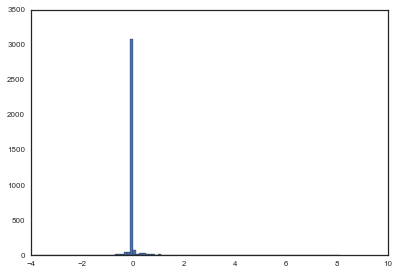

In [6]:
plt.hist(X[:, 2],bins=100)
print X[:, 2]!=-0.0087651827841
print stats.mode(X[:, 2])

for i in range(500): print X[:, 2][i]

#plt.hist(X[:, 2][abs(X[:, 2]-0.0) >= 0.02],bins=40)

In [7]:
#indo = (abs(X[:, 1]-0.0) >= 0.01) & (abs(X[:, 11]+0.3562396) >= 0.01) & (abs(X[:, 12]-0.00206697) >= 0.01)


#(X[:, 11] == -0.3562396)
indo = abs(X[:, 1]-0.0) >= 0.01
X1 = X[indo]
#X1 = X
obj_ids = numpy.arange(len(X1))

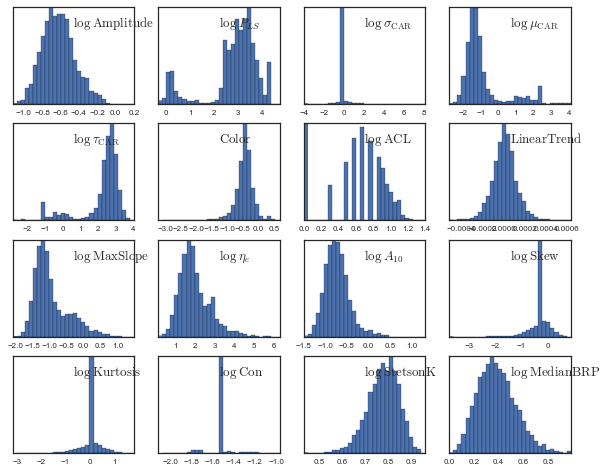

In [8]:
plt.figure(figsize=(10,8))
feat_names = [r"$\log\: \mathrm{Amplitude}$",r"$\log\: P_{LS}$",r"$\log\: \sigma_{\mathrm{CAR}}$",
              r"$\log\: \mu_{\mathrm{CAR}}$",r"$\log\: \tau_{\mathrm{CAR}}$",r"$\mathrm{Color}$",
              r"$\log\: \mathrm{ACL}$",r"$\mathrm{Linear Trend}$",r"$\log\: \mathrm{MaxSlope}$",
              r"$\log\: \eta_e$",r"$\log\: A_{10}$",r"$\log\: \mathrm{Skew}$",r"$\log\: \mathrm{Kurtosis}$",
              r"$\log\: \mathrm{Con}$",r"$\log\: \mathrm{StetsonK}$",r"$\log\: \mathrm{MedianBRP}$"]

for i in range(16):
    fig1 = plt.subplot(4,4,i+1)
    h = plt.hist(X1[:, i],bins=30)
    #print h[0]
    plt.text(h[1][0]+(h[1][-1]-h[1][0])*0.5,0.8*max(h[0]),feat_names[i],size=13)
    plt.axis('tight')
    fig1.axes.get_yaxis().set_visible(False)

    
plt.savefig('features_hist.jpg',dpi=300,bbox_inches='tight')

In [12]:
print stats.mode(X1[:, 2])
#print X1[:, 2]

ModeResult(mode=array([-3.98233026]), count=array([1]))


In [9]:
def return_synthetic_data(X):
    """
    The function returns a matrix with the same dimensions as X but with synthetic data
    based on the marginal distributions of its featues
    """
    features = len(X[0])
    X_syn = numpy.zeros(X.shape)

    for i in xrange(features):
        obs_vec = X[:,i]
        syn_vec = numpy.random.choice(obs_vec, len(obs_vec)) # here we chose the synthetic data to match the marginal distribution of the real data
        X_syn[:,i] += syn_vec

    return X_syn

X_syn = return_synthetic_data(X1)

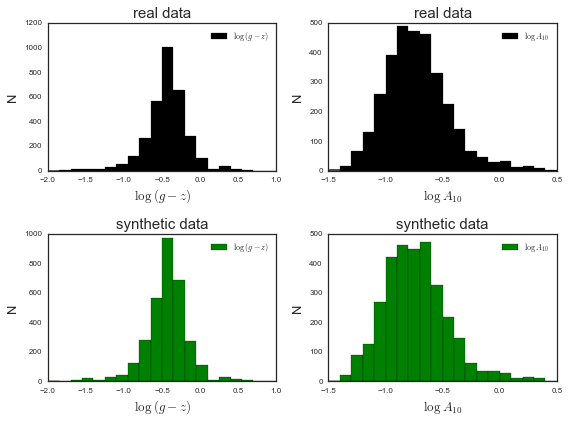

In [10]:
plt.rcParams['figure.figsize'] = 8, 6

plt.subplot(2, 2, 1)
plt.title("real data",size=15)
tmp = plt.hist(X1[:, 5], color="k", label=r"$\log\: (g-z)$",bins=20,range=[-2, 1])
plt.legend(loc="best")
plt.xlabel(r"$\log\: (g-z)$",size=13)
plt.ylabel("N",size=13)


plt.subplot(2, 2, 2)
plt.title("real data",size=15)
tmp = plt.hist(X1[:, 10], color="k", label=r"$\log\: A_{10}$",bins=20,range=[-1.5, 0.5])
plt.legend(loc="best")
plt.xlabel(r"$\log\: A_{10}$",size=13)
plt.ylabel("N",size=13)


plt.subplot(2, 2, 3)
plt.title("synthetic data",size=15)
tmp = plt.hist(X_syn[:, 5], color="g", label=r"$\log\: (g-z)$",bins=20,range=[-2, 1])
plt.legend(loc="best")
plt.xlabel(r"$\log\: (g-z)$",size=13)
plt.ylabel("N",size=13)


plt.subplot(2, 2, 4)
plt.title("synthetic data",size=15)
tmp = plt.hist(X_syn[:, 10], color="g", label=r"$\log\: A_{10}$",bins=20,range=[-1.5, 0.5])
plt.legend(loc="best")
plt.xlabel(r"$\log\: A_{10}$",size=13)
plt.ylabel("N",size=13)


plt.tight_layout()
#plt.savefig('marginals.jpg',dpi=300,bbox_inches='tight')

(-0.0005, 0.0005)

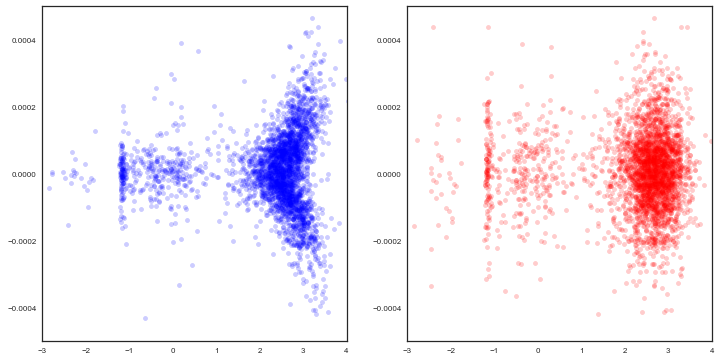

In [29]:
plt.rcParams['figure.figsize'] = 12, 6
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 4],X1[:, 7],alpha=0.2,color='blue')
plt.xlim(-3,4)
plt.ylim(-0.0005,0.0005)
plt.subplot(1, 2, 2)
plt.scatter(X_syn[:, 4],X_syn[:, 7],alpha=0.2,color='red')
plt.xlim(-3,4)
plt.ylim(-0.0005,0.0005)

(-2.5, 2.0)

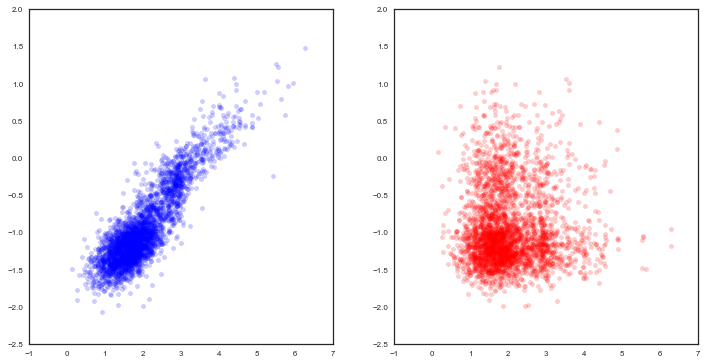

In [33]:
plt.rcParams['figure.figsize'] = 12, 6
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 9],X1[:, 8],alpha=0.2,color='blue')
#plt.xlim(-3,4)
plt.ylim(-2.5,2.0)
plt.subplot(1, 2, 2)
plt.scatter(X_syn[:, 9],X_syn[:, 8],alpha=0.2,color='red')
plt.ylim(-2.5,2.0)
#plt.ylim(-0.0005,0.0005)

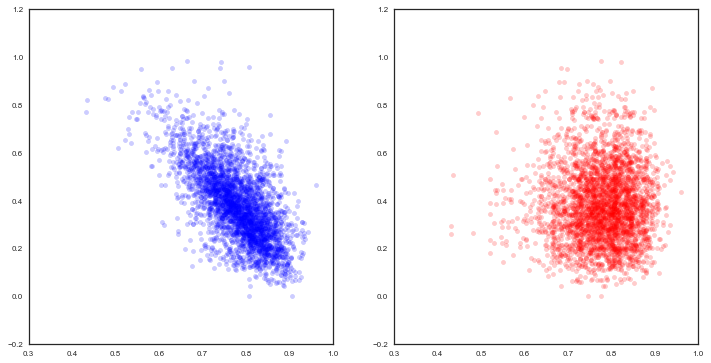

In [35]:
plt.rcParams['figure.figsize'] = 12, 6
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 14],X1[:, 15],alpha=0.2,color='blue')
#plt.xlim(-3,4)
#plt.ylim(-2.5,1.5)
plt.subplot(1, 2, 2)
plt.scatter(X_syn[:, 14],X_syn[:, 15],alpha=0.2,color='red')
#plt.ylim(-2.5,1.5)
#plt.ylim(-0.0005,0.0005)

(-3.0, 1.0)

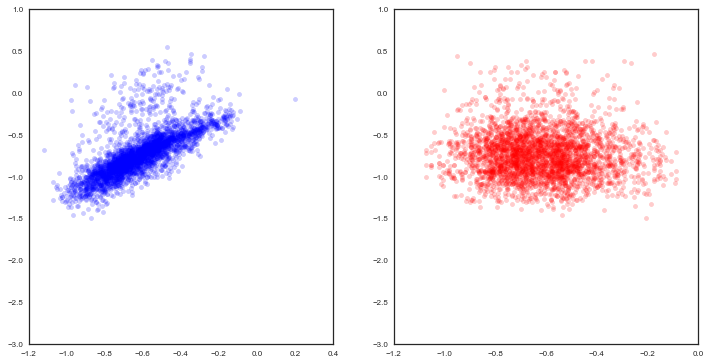

In [42]:
plt.rcParams['figure.figsize'] = 12, 6
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0],X1[:, 10],alpha=0.2,color='blue')
#plt.xlim(-3,4)
plt.ylim(-3.0,1.0)
plt.subplot(1, 2, 2)
plt.scatter(X_syn[:, 0],X_syn[:, 10],alpha=0.2,color='red')
plt.ylim(-3.0,1.0)
#plt.ylim(-0.0005,0.0005)

In [11]:
def merge_work_and_synthetic_samples(X, X_syn):
    """
    The function merges the data into one sample, giving the label "1" to the real data and label "2" to the synthetic data
    """
    # build the labels vector
    Y = numpy.ones(len(X))
    Y_syn = numpy.ones(len(X_syn)) * 2

    Y_total = numpy.concatenate((Y, Y_syn))
    X_total = numpy.concatenate((X, X_syn))
    return X_total, Y_total

X_total, Y_total = merge_work_and_synthetic_samples(X1, X_syn)
# declare an RF
N_TRAIN = 10 # number of trees in the forest
rand_f = sklearn.ensemble.RandomForestClassifier(n_estimators=N_TRAIN)
rand_f.fit(X_total, Y_total)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
def build_similarity_matrix(rand_f, X):
    """
    The function builds the similarity matrix based on the feature matrix X for the results Y
    based on the random forest we've trained
    the matrix is normalised so that the biggest similarity is 1 and the lowest is 0

    This function counts only leaves in which the object is classified as a "real" object 
    it is also implemented to optimize running time, asumming one has enough running memory
    """
    # apply to get the leaf indices
    apply_mat = rand_f.apply(X)
    # find the predictions of the sample
    is_good_matrix = numpy.zeros(apply_mat.shape)
    for i, est in enumerate(rand_f.estimators_):
        d = est.predict_proba(X)[:, 0] == 1
        is_good_matrix[:, i] = d
    # mark leaves that make the wrong prediction as -1, in order to remove them from the distance measurement
    apply_mat[is_good_matrix == False] = -1 
    # now calculate the similarity matrix
    sim_mat = numpy.sum((apply_mat[:, None] == apply_mat[None, :]) & (apply_mat[:, None] != -1) & (apply_mat[None, :] != -1), axis=2) / numpy.asfarray(numpy.sum([apply_mat != -1], axis=2), dtype='float')
    return sim_mat

sim_mat = build_similarity_matrix(rand_f, X1)
dis_mat = 1 - sim_mat

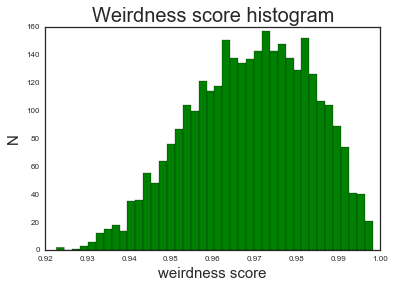

In [13]:
sum_vec = numpy.sum(dis_mat, axis=1)
sum_vec /= float(len(sum_vec))

plt.rcParams['figure.figsize'] = 6, 4
plt.title("Weirdness score histogram",size=20)
tmp = plt.hist(sum_vec, bins=40, color="g")
plt.ylabel("N",size=15)
plt.xlabel("weirdness score",size=15)
#plt.savefig('weirdness_score.jpg',dpi=300,bbox_inches='tight')

In [18]:
print shape(sum_vec)
print shape(obj_ids)

(3201,)
(3201,)


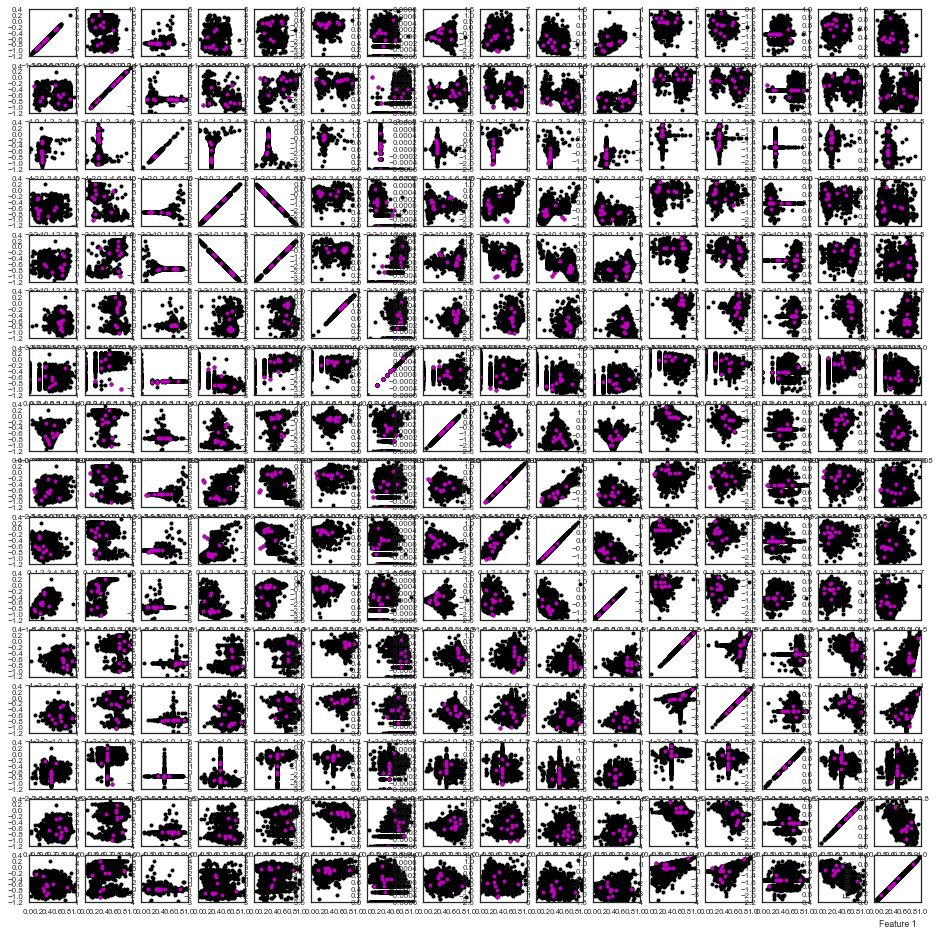

In [20]:
N_outliers = 10
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

fig, axes = plt.subplots(nrows=16, ncols=16)
fig.set_size_inches(16, 16)

for i in range(16):
    for j in range(16):
        axes[i, j].plot(X1[:,i], X1[:,j], "ok", label="input data", markersize=4)
        axes[i, j].plot(X1[obj_ids_outliers, i], X1[obj_ids_outliers, j], "om", label="outliers", markersize=4)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")	
        

#for i in range(16):
#    for h in range(16):
#        fig1 = plt.subplot(16,16,i+1)
#        plt.title("Data and outliers")
#        plt.plot(X1[:,1], X1[:,0], "ok", label="input data", markersize=4)
#        plt.plot(X1[obj_ids_outliers, 1], X1[obj_ids_outliers, 0], "om", label="outliers", markersize=4)
#        plt.xlabel("Feature 1")
#        plt.ylabel("Feature 2")	
#        plt.legend(loc="best")

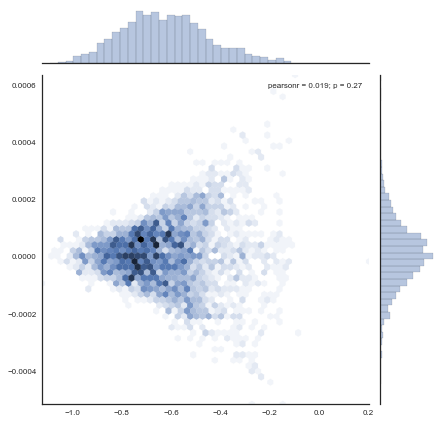

In [31]:
N_outliers = 10
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

#plt.figure(figsize=(10,4))

#plt.subplot(1, 2, 1)
#plt.rcParams['figure.figsize'] = 5, 5
##plt.title("Data and outliers")
#plt.plot(X1[:,0], X1[:,7],"ok", label="input daya", markersize=4)
##plt.plot(X1[obj_ids_outliers, 0], X1[obj_ids_outliers, 7], "om", label="outliers", markersize=4)
#plt.xlabel(r"$\log \rm{(Amplitude)}$",size=15)
#plt.ylabel(r"$\rm{Linear\: trend}$",size=15)	
##plt.zlabel("Feature 3")
#plt.legend(loc="best")

#plt.subplot(1, 3, 2)
#plt.rcParams['figure.figsize'] = 5, 5
##plt.title("Data and outliers")
#plt.plot(X1[:,9], X1[:,7],"ok", label="input daya", markersize=4)
##plt.plot(X1[obj_ids_outliers, 9], X1[obj_ids_outliers, 7], "om", label="outliers", markersize=4)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")	
##plt.zlabel("Feature 3")
#plt.legend(loc="best")


fig1 = sns.jointplot(X1[:,0], X1[:,7],kind='hex')
#ax_marg_x.set_axis_off()
#ax_marg_y.set_axis_off()

#plt.subplot(1, 2, 2)
#plt.rcParams['figure.figsize'] = 5, 5
##plt.title("Data and outliers")
#plt.plot(X1[:,15], X1[:,14],"ok", label="input daya", markersize=4)
##plt.plot(X1[obj_ids_outliers, 15], X1[obj_ids_outliers, 14], "om", label="outliers", markersize=4)
#plt.xlabel(r"$\log\: \mathrm{BRP}$",size=15)
#plt.ylabel(r"$\log\: \mathrm{(StetsonK)}$",size=15)	
##plt.zlabel("Feature 3")
#plt.legend(loc="best")
#plt.savefig('correl_features.jpg',dpi=300,bbox_inches='tight')

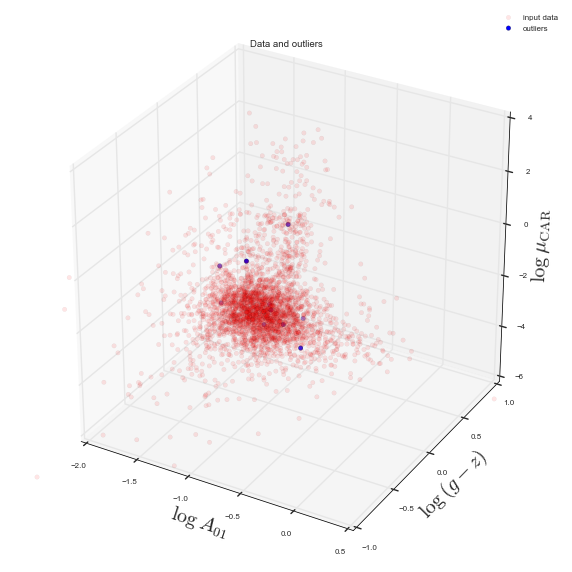

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

N_outliers = 10
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

plt.rcParams['figure.figsize'] = 5, 5
plt.title("Data and outliers")
ax.scatter(X1[:,10], X1[:,5], X1[:,3], "ok", label="input data",c='red',alpha=0.1)
ax.scatter(X1[obj_ids_outliers, 10], X1[obj_ids_outliers, 5], X1[obj_ids_outliers, 3], "om", label="outliers",c='blue')
ax.set_xlabel(r"$\log\: A_{01}$",size=20)
ax.set_ylabel(r"$\log\: (g-z)$",size=20)
ax.set_zlabel(r"$\log\: \mu_{\rm{CAR}}$",size=20)
ax.set_xlim(-2,0.5)
ax.set_ylim(-1,1)
ax.set_zlim(-6,4)
plt.legend(loc="best")
#plt.savefig('outliers_3D.jpg',dpi=300,bbox_inches='tight')

In [24]:
N_outliers = 10
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

sum_vec_outliers1 = numpy.sort(sum_vec)[:N_outliers]
obj_ids_outliers1 = obj_ids[numpy.argsort(sum_vec)][:N_outliers]

print obj_ids_outliers
print obj_ids_outliers1

[1723 2063 2773 2267 1239 1888 1323  394 2990 2098]
[1701 2366 2315 2501 2001 1761  750 1286 2454  623]


In [25]:
names_curves = np.load('ids_curves_training.npy')
names_curves1 = names_curves[indo]

#print len(names_curves1)

In [27]:
print names_curves1[obj_ids_outliers1]
#print names_curves1[obj_ids_outliers]

['LC_3306761.dat' 'LC_4130096.dat' 'LC_4099.dat' 'LC_4699038.dat'
 'LC_3872028.dat' 'LC_3490598.dat' 'LC_1736120.dat' 'LC_2536996.dat'
 'LC_4433015.dat' 'LC_1628736.dat']


In [78]:
#plt.hist(X1[:, 1],bins=40)
print X1[:, 4][1398]

1.46812438378


In [94]:
print 1-(-1)

2


### Interesting findings:

* *Amplitud-Color distribution*: short amplitudes are less spread among colors. i.e. Color difference is larger for larger amplitudes of the variations.
* The fact that all objects have a weirdness score above 0.9 is interesting. It means that all objects are rather weird with respect to the rest. i.e., on average, distances betwee objects in the feature space is quite large. This might be because we are still using only a reduced number of features (or perhaps too many random forests?)



In [35]:
(1-0.1)*10

9.0

In [37]:
print 10.0**1.05

11.220184543


In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [5]:
c = SkyCoord('04 52 00.0 -69 22 30', unit=(u.hourangle, u.deg))

In [6]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    ( 73., -69.375)>